## Conv Net Approach

This aim of this notebook is to check the preliminary results of the end-to-end convolutional network approach. The code in here is not the final version, just some tests.

(this notebook was developed using a kaggle kernel, so the to run it locally one may need to make some adjustments) 

In [1]:
import numpy as np # linear algebra}
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import imageio
import matplotlib.pyplot as plt
import cv2

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from sklearn.model_selection import train_test_split


import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['list_attr_celeba.csv', 'list_eval_partition.csv', 'list_landmarks_align_celeba.csv', 'img_align_celeba', 'list_bbox_celeba.csv']


In [2]:
%%time
img_path = '../input/img_align_celeba/img_align_celeba/'
dataset_size = 1000
X = []
for i in range(1, dataset_size):
    img =  imageio.imread(f'{img_path}{i:06d}.jpg')
    X.append(img)

CPU times: user 1.06 s, sys: 220 ms, total: 1.28 s
Wall time: 3.97 s


In [3]:
X = np.array(X)
print(X.shape)

(999, 218, 178, 3)


In [4]:
%%time

w = X.shape[1]
h = X.shape[2]

X_bad = []
for x in X:
    small = cv2.resize(x, (h // 2, w // 2), interpolation= cv2.INTER_LINEAR)
    bad = cv2.resize(small, (h, w), interpolation= cv2.INTER_LINEAR)
    X_bad.append(bad)
X_bad = np.array(X_bad)

CPU times: user 180 ms, sys: 72 ms, total: 252 ms
Wall time: 269 ms


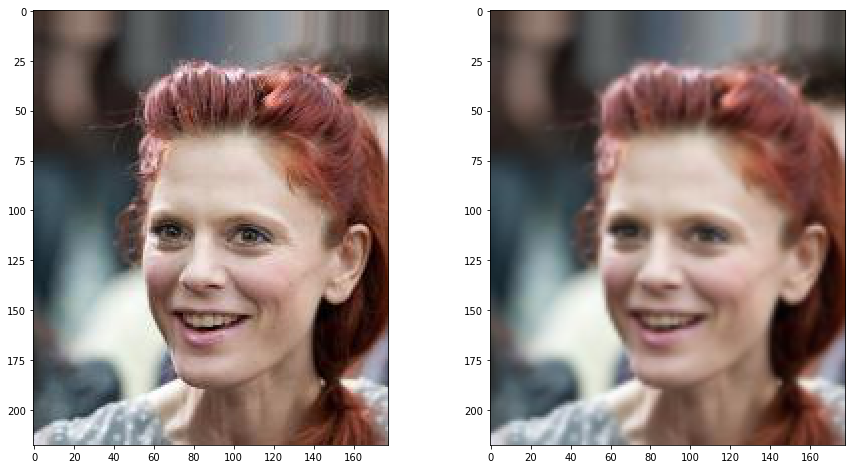

In [5]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.imshow(X[1])
plt.subplot(122)
plt.imshow(X_bad[1])

In [6]:
X_norm = X / 255
X_bad_norm = X_bad / 255

In [7]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(218, 178, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(3, (3, 3)))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 216, 176, 128)     3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 214, 174, 64)      73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 212, 172, 3)       1731      
Total params: 79,107
Trainable params: 79,107
Non-trainable params: 0
_________________________________________________________________


In [9]:
a = (218 - 212)//2
b = (178 - 172)//2

X[:, a:218-a, b:178-b, :].shape

(999, 212, 172, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_bad_norm, X_norm[:, a:218-a, b:178-b, :], test_size=0.2, random_state=23)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 218, 178, 3)
(200, 218, 178, 3)
(799, 212, 172, 3)
(200, 212, 172, 3)


In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=64, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
799/799 [==============================] - 9s 12ms/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 2/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 3/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 4/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 5/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 6/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 7/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 8/50
799/799 [==============================] - 4s 5ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 9/50
799/799 [==============================] - 4s 5ms/step - los

In [12]:
y_pred = model.predict(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


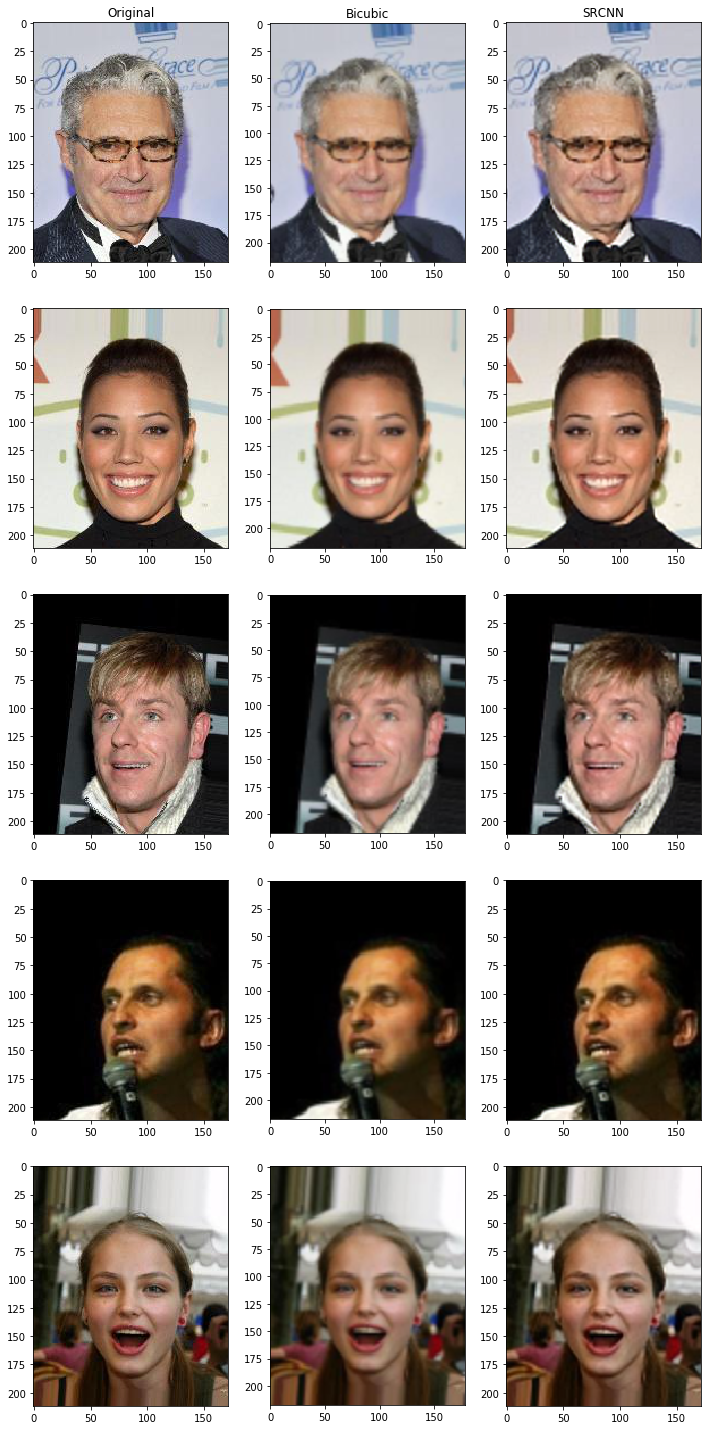

In [13]:
n_ex = 5
fig, ax = plt.subplots(nrows=n_ex, ncols=3, figsize=(10, 20))
fig.tight_layout()
for i in range(n_ex):
    idx = np.random.randint(0, y_pred.shape[0])
    if i == 0:
        ax[i,0].set_title('Original')
        ax[i,1].set_title('Bicubic')
        ax[i,2].set_title('SRCNN')
    ax[i, 0].imshow(y_test[idx])
    ax[i, 1].imshow(X_test[idx])
    ax[i, 2].imshow(y_pred[idx])